In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-satisfaction/sample_submission.csv
/kaggle/input/santander-customer-satisfaction/train.csv
/kaggle/input/santander-customer-satisfaction/test.csv


In [20]:
#Ajustando a visualização de colunas
pd.set_option('display.max_columns', None)

#Importando os dados
train=pd.read_csv('../input/santander-customer-satisfaction/train.csv')
test=pd.read_csv('../input/santander-customer-satisfaction/test.csv')

#Olhando as 5 primeiras linhas do conjunto de treinamento
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [3]:
#Olhando as 5 primeiras linhas do conjunto de teste
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


### Analisando os dados

In [28]:
# Para facilitar o trabalho e enxergar tudo de maneira organizada e resumida, vamos definir uma função:

def info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('TIPOS DE DADOS POR FEATURE:')
    print(data.info())
    print('\n', '-'*50)
    print('NÚMERO DE VALORES ÚNICOS POR FEATURE \n')
    print(data.nunique())
    print('\n', '-'*50)
    print('VALORES NULOS POR FEATURE')
    existe = data.isnull().sum().any()
    print('Existe algum valor nulo?: ' + str(existe))
    print(data.isnull().sum())
    print('\n', '-'*50)
    print('ESTATÍSTICAS BÁSICAS')
    print(data.describe())

In [29]:
info(train)

DATASET SHAPE:  (76020, 371) 

--------------------------------------------------
TIPOS DE DADOS POR FEATURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
None

 --------------------------------------------------
NÚMERO DE VALORES ÚNICOS POR FEATURE 

ID                               76020
var3                               208
var15                              100
imp_ent_var16_ult1                 596
imp_op_var39_comer_ult1           7551
imp_op_var39_comer_ult3           9099
imp_op_var40_comer_ult1            293
imp_op_var40_comer_ult3            346
imp_op_var40_efect_ult1             23
imp_op_var40_efect_ult3             29
imp_op_var40_ult1                  224
imp_op_var41_comer_ult1           7421
imp_op_var41_comer_ult3           8961
imp_op_var41_efect_ult1            331
imp_op_var41_efect_ult3            454
imp_op_var41_ult1                 8032
im

Observamos que não existem valores nulos no dataset. A variável "ID", aparentemente, é o único valor único de diferenciação dentre os outros.
A função .info() indica "dtypes: float64(111), int64(260)", portanto não existem variáveis categóricas.

In [30]:
info(test)

DATASET SHAPE:  (75818, 370) 

--------------------------------------------------
TIPOS DE DADOS POR FEATURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB
None

 --------------------------------------------------
NÚMERO DE VALORES ÚNICOS POR FEATURE 

ID                               75818
var3                               199
var15                              100
imp_ent_var16_ult1                 598
imp_op_var39_comer_ult1           7593
imp_op_var39_comer_ult3           9154
imp_op_var40_comer_ult1            314
imp_op_var40_comer_ult3            363
imp_op_var40_efect_ult1             30
imp_op_var40_efect_ult3             34
imp_op_var40_ult1                  245
imp_op_var41_comer_ult1           7444
imp_op_var41_comer_ult3           8985
imp_op_var41_efect_ult1            338
imp_op_var41_efect_ult3            475
imp_op_var41_ult1                 8007
imp

Observamos que, assim como na base de treinamento, não existem valores nulos em nenhuma coluna do dataset. Enquanto na base de treino existem 76020 amostras, na base de teste existem 75818, o que é uma divisão quase de 50% para treino e teste. Idealmente esta divisão deveria ter uma maior proporção para o treino.
A função .info() indica "dtypes: float64(110), int64(260)", portanto não existem variáveis categóricas.

In [13]:
print(train['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


Text(0, 0.5, 'Quantidade')

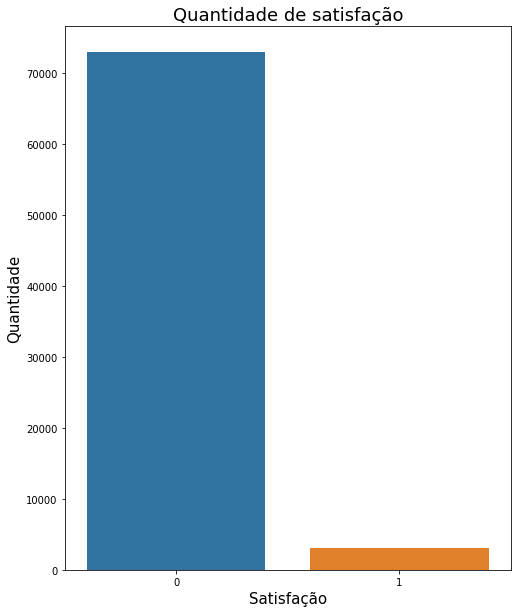

In [18]:
#Configurações de visualização
fig = plt.figure(figsize=(8,10))

#Gerando o gráfico
ax = sns.countplot(data=train, 
                 x='TARGET',  
                 order=train['TARGET'].value_counts().index,
                )
ax.set_title('Quantidade de satisfação', fontsize=18)
ax.set_xlabel('Satisfação', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15) 


Note que temos muito mais exemplos de não satisfação (TARGET=0) do que de satisfação (Target=1). Idealmente, é interessante considerar técnicas de balanceamento de base de dados.

In [ ]:
X_train=train.copy()
X_train.drop(labels=['ID'], axis=1, inplace = True)
print(train.shape)
print(X_train.shape)
X_train.head()

In [ ]:
# using sklearn variancethreshold to find features with low variance

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)  # fit finds the features with low variance

# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

# print the constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

X2_train=X_train.columns[sel.get_support()].copy()

# we can then drop these columns from the train and test sets
X_train = sel.transform(X_train)

In [ ]:
X_train=pd.DataFrame(X_train,columns=X2_train)
X_train.head()

In [ ]:
corr_matrix = X_train.corr()
#print(corr_matrix)
corr_matrix["TARGET"].sort_values(ascending=False)

In [ ]:
print(X_train.columns.get_loc("var36"))
print(X_train.columns.get_loc("var15"))

In [ ]:
X_train.drop(X_train.columns[133:274],axis=1,inplace=True)
X_train.drop(X_train.columns[2:132],axis=1,inplace=True)
X_train.drop(X_train.columns[0],axis=1,inplace=True)
X_train.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled = scaler.fit_transform(X_train)
X_train_norm = pd.DataFrame(scaled, columns=X_train.columns)

In [ ]:
Y_train=train["TARGET"]
scaler = MinMaxScaler()
Y_train_norm=Y_train.to_numpy()
Y_train_norm=Y_train_norm.reshape(-1,1)
scaler.fit(Y_train_norm)
scaled = scaler.fit_transform(Y_train_norm)
Y_train_norm.shape #= pd.DataFrame(scaled, columns=train[371])
#Y_train_norm.head()
X_train_norm.shape

In [ ]:
Y_train_norm.dtypes

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=32)
X_train_sm,Y_train_sm = smote.fit(X_train,Y_train)

In [ ]:
from sklearn.neural_network import MLPClassifier
net = MLPClassifier(solver='adam', activation='logistic', alpha=1e-5, hidden_layer_sizes=(50), random_state=1)
net.out_activation_='identity'
net.fit(X_train_norm, Y_train_norm)
net.score(X_train_norm,Y_train_norm)

In [ ]:
test=pd.read_csv('../input/santander-customer-satisfaction/test.csv')
test.head()

In [ ]:
X_test = test.copy()
X_test.drop(labels=['ID'], axis=1, inplace = True)
print(X_test.columns.get_loc("var36"))
print(X_test.columns.get_loc("var15"))
X_test.head()

In [ ]:
X_test.drop(X_test.columns[194:370],axis=1,inplace=True)
X_test.drop(X_test.columns[2:193],axis=1,inplace=True)
X_test.drop(X_test.columns[0],axis=1,inplace=True)
X_test.head()

In [ ]:
X_train.describe()

In [ ]:
X_test.describe()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_test)
scaled = scaler.fit_transform(X_test)
X_test_norm = pd.DataFrame(scaled, columns=X_test.columns)
Y_pred = net.predict(X_test_norm)

In [ ]:
Y_train.describe()